In [41]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from my_answers import *

%load_ext autoreload
%autoreload 2

from my_answers import *

### load in and normalize the dataset
dataset = np.loadtxt('datasets/normalized_apple_prices.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lets take a quick look at the (normalized) time series we'll be performing predictions on.

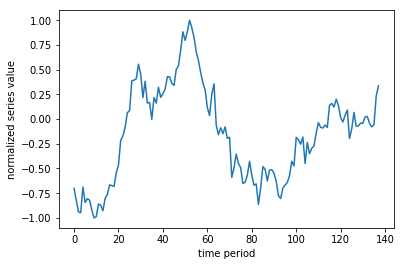

In [42]:
# lets take a look at our time series
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

In [43]:
odd_nums = np.array([1,3,5,7,9,11,13])

Here is a hard-coded solution for odd_nums.  You can compare its results with what you get from your **window_transform_series** implementation.

In [44]:
# run a window of size 2 over the odd number sequence and display the results
window_size = 2

X = []
X.append(odd_nums[0:2])
X.append(odd_nums[1:3])
X.append(odd_nums[2:4])
X.append(odd_nums[3:5])
X.append(odd_nums[4:6])

y = odd_nums[2:]

X = np.asarray(X)
y = np.asarray(y)
y = np.reshape(y, (len(y),1)) #optional

assert(type(X).__name__ == 'ndarray')
assert(type(y).__name__ == 'ndarray')
assert(X.shape == (5,2))
assert(y.shape in [(5,1), (5,)])

# print out input/output pairs --> here input = X, corresponding output = y
print ('--- the input X will look like ----')
print (X)

print ('--- the associated output y will look like ----')
print (y)

--- the input X will look like ----
[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]]
--- the associated output y will look like ----
[[ 5]
 [ 7]
 [ 9]
 [11]
 [13]]


Again - you can check that your completed **window_transform_series** function works correctly by trying it on the odd_nums sequence - you should get the above output.

In [45]:
### TODO: implement the function window_transform_series in the file my_answers.py
from my_answers import window_transform_series

With this function in place apply it to the series in the Python cell below.  We use a window_size = 7 for these experiments.

In [46]:
# window the data using your windowing function
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)

In [48]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [49]:
X_test.shape

(43, 7, 1)

<a id='TODO_2'></a>

##   Build and run an RNN regression model



In [50]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)


# TODO: implement build_part1_RNN in my_answers.py
from my_answers import build_part1_RNN
model = build_part1_RNN(window_size)

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [51]:
# run your model!
model.fit(X_train, y_train, epochs=300, batch_size=50, verbose=0)

In [52]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In the next cell we compute training and testing errors using our trained model - you should be able to achieve at least

*training_error* < 0.02

and 

*testing_error* < 0.02

with your fully trained model.  

If either or both of your accuracies are larger than 0.02 re-train your model - increasing the number of epochs you take (a maximum of around 1,000 should do the job) and/or adjusting your batch_size.

In [53]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0176693272184
testing error = 0.0138189132477


Activating the next cell plots the original data, as well as both predictions on the training and testing sets. 

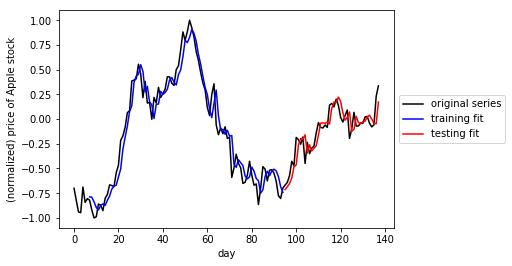

In [54]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

With our function complete we can now use it to produce input/output pairs!  We employ the function in the next cell, where the window_size = 50 and step_size = 5.

In [103]:
# run your text window-ing function 
window_size = 100
step_size = 5
inputs, outputs = window_transform_text(text,window_size,step_size)

Lets print out a few input/output pairs to verify that we have made the right sort of stuff!

In [104]:
# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + inputs[2])
print('output = ' + outputs[2])
print('--------------')
print('input = ' + inputs[100])
print('output = ' + outputs[100])

input = e eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love f
output = o
--------------
input = er excellent for drawing the veil from men s motives and actions. but for the trained reasoner to ad
output = m


Looks good!

In [105]:
# print out the number of unique characters in the dataset
chars = sorted(list(set(text)))
print ("this corpus has " +  str(len(chars)) + " unique characters")
print ('and these characters are ')
print (chars)

this corpus has 33 unique characters
and these characters are 
[' ', '!', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [106]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [108]:
# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,window_size,step_size):
    # number of unique chars
    chars = sorted(list(set(text)))
    num_chars = len(chars)
    
    # cut up text into character input/output pairs
    inputs, outputs = window_transform_text(text,window_size,step_size)
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    y = np.zeros((len(inputs), num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and transform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            X[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[outputs[i]]] = 1
        
    return X,y

In [109]:
# use your function
window_size = 100
step_size = 5
X,y = encode_io_pairs(text,window_size,step_size)

In [111]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import keras
import random

# TODO implement build_part2_RNN in my_answers.py
from my_answers import build_part2_RNN

model = build_part2_RNN(window_size, len(chars))

# initialize optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile model --> make sure initialized optimizer and callbacks - as defined above - are used
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [112]:
# a small subset of our input/output pairs
Xsmall = X[:10000,:,:]
ysmall = y[:10000,:]

In [113]:
# train the model
model.fit(Xsmall, ysmall, batch_size=500, epochs=40,verbose = 1)

# save weights
model.save_weights('model_weights/best_RNN_small_textdata_weights.hdf5')

Epoch 1/40
10000/10000 [==============================] - 4s - loss: 3.0865     
Epoch 2/40
10000/10000 [==============================] - 4s - loss: 2.8943     
Epoch 3/40
10000/10000 [==============================] - 4s - loss: 2.8772     
Epoch 4/40
10000/10000 [==============================] - 4s - loss: 2.8443     
Epoch 5/40
10000/10000 [==============================] - 4s - loss: 2.7966     
Epoch 6/40
10000/10000 [==============================] - 4s - loss: 2.7322     
Epoch 7/40
10000/10000 [==============================] - 4s - loss: 2.6563     
Epoch 8/40
10000/10000 [==============================] - 4s - loss: 2.5877     
Epoch 9/40
10000/10000 [==============================] - 4s - loss: 2.5303     
Epoch 10/40
10000/10000 [==============================] - 4s - loss: 2.4628     
Epoch 11/40
10000/10000 [==============================] - 4s - loss: 2.4234     
Epoch 12/40
10000/10000 [==============================] - 4s - loss: 2.3815     
Epoch 13/40
10000/10000 [

In [114]:
# function that uses trained model to predict a desired number of future characters
def predict_next_chars(model,input_chars,num_to_predict):     
    # create output
    predicted_chars = ''
    for i in range(num_to_predict):
        # convert this round's predicted characters to numerical input    
        x_test = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(input_chars):
            x_test[0, t, chars_to_indices[char]] = 1.

        # make this round's prediction
        test_predict = model.predict(x_test,verbose = 0)[0]

        # translate numerical prediction back to characters
        r = np.argmax(test_predict)                           # predict class of each test input
        d = indices_to_chars[r] 

        # update predicted_chars and input
        predicted_chars+=d
        input_chars+=d
        input_chars = input_chars[1:]
    return predicted_chars

In [115]:
# TODO: choose an input sequence and use the prediction function in the previous Python cell to predict 100 characters following it
# get an appropriately sized chunk of characters from the text
start_inds = [10,5000,15000]

# load in weights
model.load_weights('model_weights/best_RNN_small_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    # print out input characters
    print('------------------')
    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)

    # print out predicted characters
    line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(line)

------------------
input chars = 
e eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love f"

predicted chars = 
oulle to the wand and the stoule for the cound the coulled of the prote the chas her of the toung wh"

------------------
input chars = 
particularly malignant boot slitting specimen of the london slavey. as to your practice, if a gentle"

predicted chars = 
 to mathe to whing whith whes was and the the what her sepppen she she wom he heve chathe fout he wa"

------------------
input chars = 
contralto hum! la scala, hum! prima donna imperial opera of warsaw yes! retired from operatic stage "

predicted chars = 
was her ong har her whishe foun the chat and the chather whas her sessed fon to me to wat wat the th"



In [116]:
### A simple way to write output to file
f = open('my_test_output.txt', 'w')              # create an output file to write too
f.write('this is only a test ' + '\n')           # print some output text
x = 2
f.write('the value of x is ' + str(x) + '\n')    # record a variable value
f.close()     

# print out the contents of my_test_output.txt
f = open('my_test_output.txt', 'r')              # create an output file to write too
f.read()

'this is only a test \nthe value of x is 2\n'

In [117]:
# a small subset of our input/output pairs
Xlarge = X[:100000,:,:]
ylarge = y[:100000,:]

# TODO: fit to our larger dataset
model.fit(Xlarge, ylarge, batch_size=500, epochs=30, verbose=1)

# save weights
model.save_weights('model_weights/best_RNN_large_textdata_weights.hdf5')

Epoch 1/30
100000/100000 [==============================] - 44s - loss: 2.0182    
Epoch 2/30
100000/100000 [==============================] - 44s - loss: 1.9267    
Epoch 3/30
100000/100000 [==============================] - 44s - loss: 1.8615    
Epoch 4/30
100000/100000 [==============================] - 44s - loss: 1.8082    
Epoch 5/30
100000/100000 [==============================] - 44s - loss: 1.7611    
Epoch 6/30
100000/100000 [==============================] - 44s - loss: 1.7187    
Epoch 7/30
100000/100000 [==============================] - 44s - loss: 1.6787    
Epoch 8/30
100000/100000 [==============================] - 44s - loss: 1.6422    
Epoch 9/30
100000/100000 [==============================] - 44s - loss: 1.6082    
Epoch 10/30
100000/100000 [==============================] - 44s - loss: 1.5750    
Epoch 11/30
100000/100000 [==============================] - 44s - loss: 1.5428    
Epoch 12/30
100000/100000 [==============================] - 44s - loss: 1.5115    
E

In [118]:
# TODO: choose an input sequence and use the prediction function in the previous Python cell to predict 100 characters following it
# get an appropriately sized chunk of characters from the text
start_inds = [100, 1000, 5000, 10000, 50000, 100000]

# save output
f = open('text_gen_output/RNN_large_textdata_output.txt', 'w')  # create an output file to write too

# load weights
model.load_weights('model_weights/best_RNN_large_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    # print out input characters
    line = '-------------------' + '\n'
    print(line)
    f.write(line)

    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)
    f.write(input_line)

    # print out predicted characters
    predict_line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(predict_line)
    f.write(predict_line)
f.close()

-------------------

input chars = 
 to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, preci"

predicted chars = 
ce inte the door which he had been the corrander of a gaid in his craccess were to noment one on the"

-------------------

input chars = 
er, of dubious and questionable memory. i had seen little of holmes lately. my marriage had drifted "

predicted chars = 
upon the seet of the stain of under was a case and to low wen in my hown on i on the day so to the p"

-------------------

input chars = 
particularly malignant boot slitting specimen of the london slavey. as to your practice, if a gentle"

predicted chars = 
man to marr and and and the start man and a san from the counse, but is i heard a rear your man, and"

-------------------

input chars = 
ide the door. then there was a loud and authoritative tap. come in! said holmes. a man entered who c"

predicted chars = 
olles was some fire that i cannged up a mat him of son whic